# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [1]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

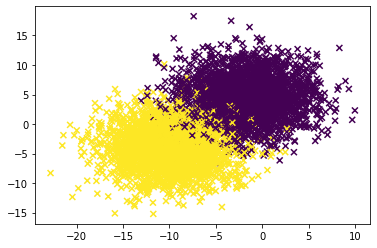

In [4]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample.
- Visualize the learned classification with matplotlib
- Calculate the classification accurracy $ \left( \frac{n_{\text{correctly_classified}}}{(n_{\text{correctly_classified}} + n_{\text{incorrectly_classified}})} \right) $
- Bonus: Calculate and plot the classification line that separates the two classes.
- After you have done the iris classification exercise, print out the classification_report using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Bonus: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution
Similar to the last exercise we first extend the feature vector with ones to have the bias implicilty included. In the next step we calculate the linear regression.

In [5]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [6]:
import numpy as np

ones = np.ones(X.shape[0]) # create a vector of ones with the same length as the dataset
X_ = np.c_[X, ones] # concatenate the ones with the dataset

weights = np.matmul(np.matmul(np.linalg.pinv(np.matmul(X_.transpose(), X_)), X_.transpose()), y)
print(weights.shape)
print("Weight-Vector:", weights[:-1])
print("Bias:", weights[-1])

(3,)
Weight-Vector: [-0.04344704 -0.04526538]
Bias: 0.2599923189056023


**Remark**: i was not exactly sure what was meant by "visualize the learned classification". So i added the separating line at this point.

The data is separated linearly by the line given by ($w$ are the weights (without bias), $b$ is the bias):
$$ \{{(x, y)}^\text{T} | (x, y) \cdot w + b = 0.5\} $$
Here we assume no additional missclassification cost for the classes.

The separation line is then given by (assuming $w_2 \neq 0$, which means that the separating line is not vertical, which can be seen in the plot above):
$$ x w_1 + y w_2 + b = 0.5 \Leftrightarrow y = \frac{0.5 - x w_1 - b}{w_2}$$

We can also draw the separation line into the scatter plot:

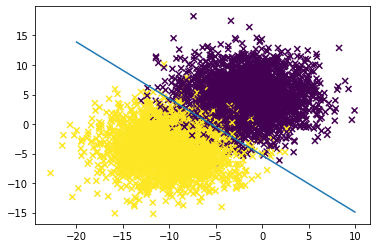

In [7]:
def sep_line(x):
    return (0.5 - x * weights[0] - weights[-1])/weights[1]
 
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.plot([-20, 10], [sep_line(-20), sep_line(10)])
plt.show()

It can be seen that the separation line separates the data best possible, of course the data can not be fully separated by a linear model.

In the next step we calculate the accuracy:

In [8]:
pred = list(map(lambda x: 1 if x > 0.5 else 0, np.matmul(X_, weights)))
n_corr = np.sum(np.equal(pred, y))
acc = n_corr / len(pred)
print("Accuracy: ", acc)

Accuracy:  0.9586


Next we will print the classification report and the PR-curve:

In [9]:
import sklearn.metrics

print(sklearn.metrics.classification_report(y_true=y, y_pred=pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2500
           1       0.96      0.96      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



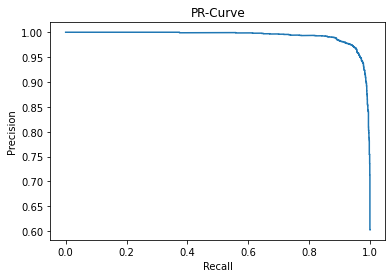

In [10]:
raw_pred = np.matmul(X_, weights)
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true=y, probas_pred=raw_pred)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-Curve")
plt.show()

Own implementation of the PR-curve:

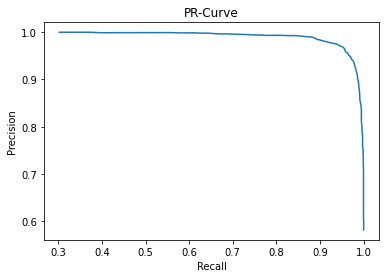

In [11]:
thresholds = np.arange(0, 1, 0.01)
precision = np.zeros(thresholds.shape)
recall = np.zeros(thresholds.shape)

for c, thresh in enumerate(thresholds):
    y_pred = list(map(lambda x: 1 if x > thresh else 0, raw_pred))
    tp = np.dot(y, y_pred)
    
    true_pred = np.sum(y_pred)
    true_label = np.sum(y)
    
    prec = tp / true_pred
    rec = tp / true_label
    
    precision[c] = prec
    recall[c] = rec
    
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-Curve")
plt.show()